## First analyze data by visualizations

In [130]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy
%matplotlib inline

In [131]:
titanic = pd.read_csv("train.csv")

In [132]:
titanic.describe()

/usr/lib64/python3.5/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,NaN,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,NaN,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,NaN,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [133]:
noise1 = np.random.normal(-1,1,titanic.shape[0])
noise2 = np.random.normal(-1,1,titanic.shape[0])

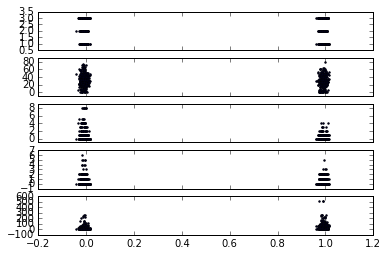

In [134]:
fig,axarr = plt.subplots(5,sharex=True)
axarr[0].scatter(titanic.Survived+noise1*0.01,titanic.Pclass,s=2)
axarr[1].scatter(titanic.Survived+noise1*0.01,titanic.Age,s=2)
axarr[2].scatter(titanic.Survived+noise1*0.01,titanic.SibSp,s=2)
axarr[3].scatter(titanic.Survived+noise1*0.01,titanic.Parch,s=2)
axarr[4].scatter(titanic.Survived+noise1*0.01,titanic.Fare,s=2)

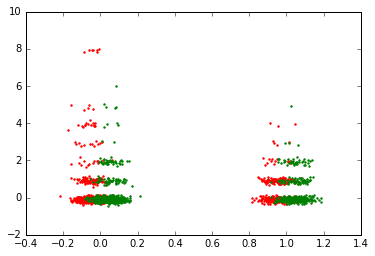

In [135]:
plt.scatter(titanic.Survived+noise1*0.05,titanic.SibSp+noise2*0.1,color='r',s=2)
plt.scatter(titanic.Survived-noise1*0.05,titanic.Parch+noise2*0.1,color='g',s=2)
#plt.scatter(titanic.Survived+noise1*0.05,titanic.Age,s=2)
#plt.scatter(titanic.Survived+noise*0.02,titanic.Fare,color='b',s=2)

In [136]:
titanic.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


## Change string to numerical

In [137]:
def sex_str_to_num(sex_entry):
    if sex_entry == "male":
        return -1
    else:
        return 1

In [138]:
titanic["Sex_num"] = titanic["Sex"].apply(lambda x: sex_str_to_num(x))
titanic["Sex_num"].value_counts()

-1    577
 1    314
Name: Sex_num, dtype: int64

In [139]:
titanic.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_num
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S,-1


In [140]:
titanic["Age"] = titanic["Age"].fillna(titanic["Age"].mean())
titanic["Fare"] = titanic["Fare"].fillna(titanic["Fare"].mean())

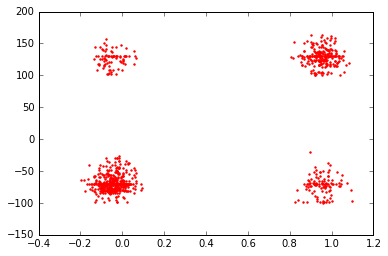

In [141]:
plt.scatter(titanic.Survived+noise*0.05,titanic.Sex_num*100+titanic.Age,color='r',s=2)

In [142]:
print(titanic["Embarked"].unique())
titanic["Embarked"].value_counts()

['S' 'C' 'Q' nan]


S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [143]:
titanic["Embarked"] = titanic["Embarked"].fillna('S')
titanic.loc[titanic["Embarked"]=="S","Embarked"]=0
titanic.loc[titanic["Embarked"]=="C","Embarked"]=1
titanic.loc[titanic["Embarked"]=="Q","Embarked"]=2

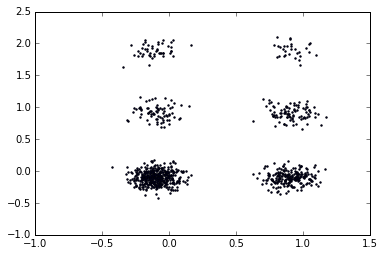

In [144]:
plt.scatter(titanic.Survived+noise1*0.1,titanic.Embarked+noise2*0.1,s=2)

### Convert cabin into numbers

In [145]:
print(titanic.Cabin.unique())
demo = titanic.loc[27,"Cabin"]
type(demo)
print(demo)

[nan 'C85' 'C123' 'E46' 'G6' 'C103' 'D56' 'A6' 'C23 C25 C27' 'B78' 'D33'
 'B30' 'C52' 'B28' 'C83' 'F33' 'F G73' 'E31' 'A5' 'D10 D12' 'D26' 'C110'
 'B58 B60' 'E101' 'F E69' 'D47' 'B86' 'F2' 'C2' 'E33' 'B19' 'A7' 'C49' 'F4'
 'A32' 'B4' 'B80' 'A31' 'D36' 'D15' 'C93' 'C78' 'D35' 'C87' 'B77' 'E67'
 'B94' 'C125' 'C99' 'C118' 'D7' 'A19' 'B49' 'D' 'C22 C26' 'C106' 'C65'
 'E36' 'C54' 'B57 B59 B63 B66' 'C7' 'E34' 'C32' 'B18' 'C124' 'C91' 'E40'
 'T' 'C128' 'D37' 'B35' 'E50' 'C82' 'B96 B98' 'E10' 'E44' 'A34' 'C104'
 'C111' 'C92' 'E38' 'D21' 'E12' 'E63' 'A14' 'B37' 'C30' 'D20' 'B79' 'E25'
 'D46' 'B73' 'C95' 'B38' 'B39' 'B22' 'C86' 'C70' 'A16' 'C101' 'C68' 'A10'
 'E68' 'B41' 'A20' 'D19' 'D50' 'D9' 'A23' 'B50' 'A26' 'D48' 'E58' 'C126'
 'B71' 'B51 B53 B55' 'D49' 'B5' 'B20' 'F G63' 'C62 C64' 'E24' 'C90' 'C45'
 'E8' 'B101' 'D45' 'C46' 'D30' 'E121' 'D11' 'E77' 'F38' 'B3' 'D6' 'B82 B84'
 'D17' 'A36' 'B102' 'B69' 'E49' 'C47' 'D28' 'E17' 'A24' 'C50' 'B42' 'C148']
C23 C25 C27


In [146]:
import math
f_nan = float('nan')

cabin_mapping = {'A':0,'B':200,'C':400,'D':600,'E':800,'F':1000,'G':1200,'T':1400}

def cabin_to_num(cabin_item):
    if type(cabin_item) is float:
        return -1
    
    cabin_str = cabin_item
    cabin_num = 0
    
    if len(cabin_str)>4:
        cabin_seq = cabin_str.split(" ")
        for item in cabin_seq:
            cabin_alpha = item[0]
            cabin_num+=cabin_mapping[cabin_alpha]
            if len(item) > 1:
                cabin_num+=int(item[1:])
        return cabin_num
    
    cabin_alpha = cabin_str[0]
    if(cabin_alpha in cabin_mapping):
        cabin_num = cabin_mapping[cabin_alpha]
        if len(cabin_str)>1:
            cabin_num+=int(cabin_str[1:])
    return cabin_num

In [147]:
titanic["Cabin_index"] = titanic["Cabin"].apply(lambda x : cabin_to_num(x))

In [148]:
titanic["Cabin_index"].describe()

count     891.000000
mean      136.656566
std       310.619546
min        -1.000000
25%        -1.000000
50%        -1.000000
75%        -1.000000
max      2273.000000
Name: Cabin_index, dtype: float64

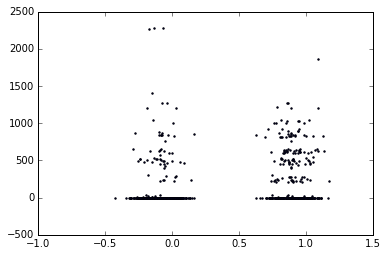

In [149]:
plt.scatter(titanic.Survived + noise1*0.1, titanic.Cabin_index, s=2)

In [150]:
titanic.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_num,Cabin_index
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,0,-1,-1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,1,1,485
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,0,1,-1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,0,1,523
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,0,-1,-1
5,6,0,3,"Moran, Mr. James",male,29.699118,0,0,330877,8.4583,NaN,2,-1,-1
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,E46,0,-1,846
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,NaN,0,-1,-1
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.1333,NaN,0,1,-1
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,NaN,1,1,-1


## Feature Normalization

In [151]:
titanic["Age_norm"] = (titanic["Age"]-(titanic.Age.mean()))/titanic.Age.std()

In [152]:
titanic["Fare_norm"] = (titanic["Fare"]-titanic.Fare.mean())/titanic.Fare.std()

In [153]:
titanic["Cabin_index_norm"] = (titanic["Cabin_index"] - titanic.Cabin_index.mean())/titanic.Cabin_index.std()

In [154]:
import numpy as np
from sklearn.feature_selection import SelectKBest, f_classif

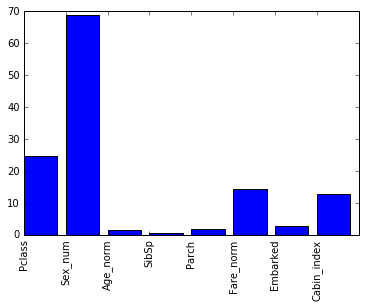

In [174]:
predictors = ["Pclass", "Sex_num", "Age_norm", "SibSp", "Parch", "Fare_norm", "Embarked","Cabin_index"]
selector = SelectKBest(f_classif, k=5)
selector.fit(titanic[predictors], titanic["Survived"])

scores = -np.log10(selector.pvalues_)

plt.bar(range(len(predictors)), scores)
plt.xticks(range(len(predictors)), predictors, rotation="vertical")
plt.show()

In [264]:
from sklearn import cross_validation
from sklearn.linear_model import LogisticRegression
predictors=["Pclass","Sex_num","Fare","Cabin_index"]
alg = LogisticRegression()
scores = cross_validation.cross_val_score(alg,titanic[predictors],titanic["Survived"],cv=10)
print(scores)
print(scores.mean())

[ 0.78888889  0.78888889  0.7752809   0.83146067  0.7752809   0.76404494
  0.76404494  0.75280899  0.80898876  0.76136364]
0.78110515265


## Apply on to test data

In [265]:
titanic_test = pd.read_csv('test.csv')

In [266]:
titanic_test["Age"]=titanic_test["Age"].fillna(titanic["Age"].mean())
titanic_test["Sex_num"]=titanic_test["Sex"].apply(lambda x: sex_str_to_num(x))
titanic_test["Embarked"]=titanic_test["Embarked"].fillna("S")
titanic_test.loc[titanic_test["Embarked"]=="S","Embarked"] = 0
titanic_test.loc[titanic_test["Embarked"]=="C","Embarked"] = 1
titanic_test.loc[titanic_test["Embarked"]=="Q","Embarked"] = 2
titanic_test["Fare"]=titanic_test["Fare"].fillna(titanic_test["Fare"].mean())

In [267]:
titanic_test["Cabin_index"] = titanic_test["Cabin"].apply(lambda x: cabin_to_num(x))
titanic_test["Age_norm"] = (titanic_test["Age"]-(titanic.Age.mean()))/titanic.Age.std()
titanic_test["Fare_norm"] = (titanic_test["Fare"]-titanic.Fare.mean())/titanic.Fare.std()
titanic_test["Cabin_index_norm"] = (titanic_test["Cabin_index"] - titanic.Cabin_index.mean())/titanic.Cabin_index.std()

In [268]:
alg = LogisticRegression()
alg.fit(titanic[predictors], titanic["Survived"])
predictions = alg.predict(titanic_test[predictors])

In [181]:
submission = pd.DataFrame({
        "PassengerId": titanic_test["PassengerId"],
        "Survived": predictions
    })

In [182]:
submission.to_csv("titanic_logistic.csv", index=False)

In [184]:
print(predictions[1])

1


## Improvements

### Ensembling

In [190]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.cross_validation import KFold
from sklearn.ensemble import RandomForestClassifier

In [191]:
predictors

['Pclass', 'Sex_num', 'Fare', 'Embarked', 'Cabin_index']

In [296]:
predictors1 = ["Pclass", "Sex_num", "Age_inv", "SibSp", "Parch", "Fare_norm", "Embarked","Cabin_index_norm"]
predictors2 = ["Pclass", "Sex_num", "Fare_norm"]
predictors3 = ["Pclass", "Sex_num", "Fare_norm", "Cabin_index_norm"]
algorithms = [
    [RandomForestClassifier(n_estimators=150, min_samples_split=4, min_samples_leaf=2),
    predictors1],
    [LogisticRegression(),predictors2],
    [GradientBoostingClassifier(n_estimators=25, max_depth=3),
    predictors3]
]

In [297]:
kf = KFold(titanic.shape[0], n_folds=3, random_state=1)

In [298]:
predictions = []
for train, test in kf:
    train_target = titanic["Survived"].iloc[train]
    full_test_predictions = []
    for alg, predictors in algorithms:
        alg.fit(titanic[predictors].iloc[train,:], train_target)
        test_predictions = alg.predict_proba(titanic[predictors].iloc[test,:].astype(float))[:,1]
        full_test_predictions.append(test_predictions)
    
    test_predictions = (full_test_predictions[0] + full_test_predictions[1] + full_test_predictions[2])/3
    test_predictions[test_predictions <= 0.5] = 0
    test_predictions[test_predictions > 0.5] = 1
    predictions.append(test_predictions)
    
predictions = np.concatenate(predictions, axis=0)

accuracy = sum(predictions[predictions == titanic["Survived"]]) / len(predictions)

print(accuracy)

0.809203142536


/usr/lib/python3.5/site-packages/ipykernel/__main__.py:17: FutureWarning: in the future, boolean array-likes will be handled as a boolean array index


In [299]:
full_predictions = []
for alg, predictors in algorithms:
    alg.fit(titanic[predictors], titanic["Survived"])
    predictions = alg.predict_proba(titanic_test[predictors].astype(float))[:,1]
    full_predictions.append(predictions)
    
predictions = (full_predictions[0] + full_predictions[1] + full_predictions[2])/3

In [300]:
predictions[predictions <= 0.5] = 0
predictions[predictions > 0.5] = 1
predictions = predictions.astype(int)

submission4 = pd.DataFrame({
        "PassengerId":
            titanic_test["PassengerId"],
        "Survived":
            predictions
    })

In [302]:
submission4.to_csv('titanic_004_ensemble.csv',index=False)

### Random Forest

In [248]:
from sklearn.ensemble import RandomForestClassifier

In [288]:
predicators = ["Pclass", "Sex_num", "Age_inv", "Fare", "Embarked", "SibSp","Parch","Cabin_index"]
alg = RandomForestClassifier(n_estimators=150, min_samples_split=4, min_samples_leaf=2)

In [291]:
titanic_test["Age_inv"] = 1.0/titanic_test["Age"]
alg.fit(titanic[predictors],titanic["Survived"])
predictions = alg.predict(titanic_test[predictors])

In [292]:
scores = cross_validation.cross_val_score(alg,titanic[predictors],titanic["Survived"],cv=3)

In [293]:
print(scores)

[ 0.79124579  0.84175084  0.82828283]


In [294]:
predictions = alg.predict(titanic_test[predictors])

In [295]:
submission3 = pd.DataFrame({
        "PassengerId": titanic_test["PassengerId"],
        "Survived": predictions
    })
submission3.to_csv('titanic_002_forest_all_features.csv',index=False)

PassengerId    893
Survived         1
Name: 1, dtype: int64

### SVM Gaussian

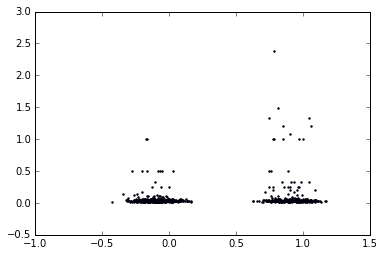

In [282]:
plt.scatter(titanic.Survived+noise1*0.1,1/titanic.Age,s=2)

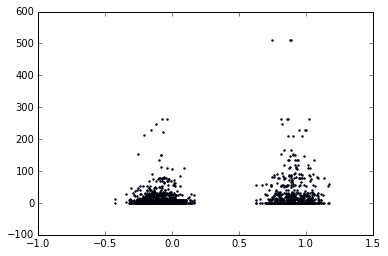

In [286]:
plt.scatter(titanic.Survived+noise1*0.1,titanic.Embarked+noise2*0.1,s=2)
plt.scatter(titanic.Survived+noise1*0.1,titanic.Fare,s=2)

In [283]:
titanic["Age_inv"] = 1.0/titanic["Age"]

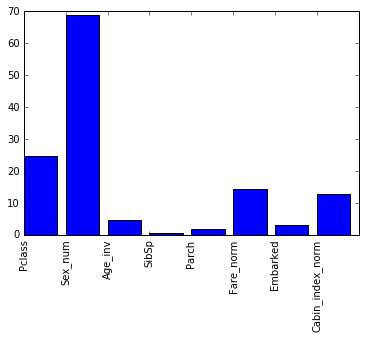

In [287]:
predictors = ["Pclass", "Sex_num", "Age_inv", "SibSp", "Parch", "Fare_norm", "Embarked","Cabin_index_norm"]
selector = SelectKBest(f_classif, k=5)
selector.fit(titanic[predictors], titanic["Survived"])

scores = -np.log10(selector.pvalues_)

plt.bar(range(len(predictors)), scores)
plt.xticks(range(len(predictors)), predictors, rotation="vertical")
plt.show()

In [ ]:
predicators = ["Pclass","Sex_num","Fare_norm","Embarked","Cabin_index"]
alg = RandomForestClassifier(n_estimators=150, min_samples_split=4, min_samples_leaf=2)
alg.fit(titanic[predictors],titanic["Survived"])
predictions = alg.predict(titanic_test[predictors])